In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

all_data = pd.concat([train,test],axis = 0)

print('train:',train.shape)
print('test:',test.shape)
print('all data:',all_data.shape)

train: (2190, 13)
test: (730, 12)
all data: (2920, 13)


In [5]:
all_data.iloc[2185:].head(10)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1.0
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1.0
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1.0
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1.0
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1.0
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3,NaN
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3,NaN
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9,NaN
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6,NaN
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4,NaN


In [6]:
#prettytable

from prettytable import PrettyTable 
mytable = PrettyTable(["Column", "Data Type","Missing in Train","Missing in Test"]) 

for column in all_data.columns:
    dtype = str(all_data[column].dtype)
    missing_train = f"{train[column].isna().sum()}/{train[column].shape[0]}"
    if column != 'rainfall':
        missing_test = f"{test[column].isna().sum()}/{test[column].shape[0]}"
    else:
        missing_test = '-'
        

    mytable.add_row([column,dtype,missing_train,missing_test])
print(mytable)

+---------------+-----------+------------------+-----------------+
|     Column    | Data Type | Missing in Train | Missing in Test |
+---------------+-----------+------------------+-----------------+
|       id      |   int64   |      0/2190      |      0/730      |
|      day      |   int64   |      0/2190      |      0/730      |
|    pressure   |  float64  |      0/2190      |      0/730      |
|    maxtemp    |  float64  |      0/2190      |      0/730      |
|  temparature  |  float64  |      0/2190      |      0/730      |
|    mintemp    |  float64  |      0/2190      |      0/730      |
|    dewpoint   |  float64  |      0/2190      |      0/730      |
|    humidity   |  float64  |      0/2190      |      0/730      |
|     cloud     |  float64  |      0/2190      |      0/730      |
|    sunshine   |  float64  |      0/2190      |      0/730      |
| winddirection |  float64  |      0/2190      |      1/730      |
|   windspeed   |  float64  |      0/2190      |      0/730   

In [7]:
print(set(test['winddirection']))

{130.0, 260.0, 10.0, 140.0, 270.0, 20.0, 280.0, 30.0, 160.0, 290.0, 40.0, 170.0, 300.0, 50.0, 180.0, 60.0, 190.0, 70.0, 200.0, 80.0, 210.0, 90.0, 220.0, 100.0, 230.0, 110.0, 240.0, nan, 120.0, 250.0}


In [8]:
np.mean(test['winddirection'])

103.92318244170096

In [9]:
#np.mean(all_data['winddirection']) #100
test['winddirection']=test['winddirection'].fillna(100)

In [10]:
test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [11]:
train = train.drop('id',axis = 1)
test = test.drop('id',axis =1)
y = train['rainfall']

In [12]:
full_cor=train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
full_cor=full_cor.rename(columns={'level_0':'output','level_1':'features',0:'score'})
full_cor[full_cor['output']== 'rainfall']

,output,features,score
11,rainfall,rainfall,1.000000
44,rainfall,cloud,0.641191
49,rainfall,sunshine,0.555287
52,rainfall,humidity,0.454213
102,rainfall,windspeed,0.111625
109,rainfall,dewpoint,0.081965
110,rainfall,maxtemp,0.079304
121,rainfall,pressure,0.049886
123,rainfall,temparature,0.049660
127,rainfall,mintemp,0.026841


In [13]:
y

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int64

## Seeing the importance with basic RF Classifier:

It is for only to see for new features how they contribute the model:

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def rf_importance(data,y):
    data = data.copy()
    data = data.drop('rainfall',axis =1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    importances = model.feature_importances_

    # View as DataFrame
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)

    print(importance_df)

In [15]:
rf_importance(train,y)

          feature  importance
7           cloud    0.305378
8        sunshine    0.164061
6        humidity    0.097790
5        dewpoint    0.062488
0             day    0.061986
10      windspeed    0.060720
2         maxtemp    0.056119
3     temparature    0.052479
1        pressure    0.049940
4         mintemp    0.049510
9   winddirection    0.039529


I have just learnt that day number in numerical value can be misleading by the model. So, we need to say the days to the model in different way:

In [16]:
#Sin and Cos Representation in Day Number:

def geo_of_day(data):
    day = data['day'].copy()
    sin_data = np.sin(2 * np.pi * day/365)
    cos_data = np.cos(2 * np.pi * day/365)
    
    return sin_data,cos_data

train['sin_day'],train['cos_day']=geo_of_day(train)
test['sin_day'],test['cos_day']=geo_of_day(test)


In [17]:
rf_importance(train,y)

          feature  importance
7           cloud    0.272255
8        sunshine    0.166794
6        humidity    0.101294
5        dewpoint    0.056621
10      windspeed    0.052675
1        pressure    0.047925
4         mintemp    0.047487
3     temparature    0.045923
2         maxtemp    0.045804
0             day    0.043664
11        sin_day    0.043488
12        cos_day    0.043210
9   winddirection    0.032860


In [18]:
train.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,sin_day,cos_day
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,0.017213,0.999852
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.034422,0.999407
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,0.051620,0.998667
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,0.068802,0.997630
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,0.085965,0.996298


In [19]:
def add_month_and_season(df):
    import pandas as pd

    # Define seasons
    winter = [12, 1, 2]
    spring = [3, 4, 5]
    summer = [6, 7, 8]
    autumn = [9, 10, 11]

    # Convert day to month (approximate method)
    df = df.copy()  # avoid changing the original DataFrame
    df['month'] = ((df['day'] - 1) // 31) + 1

    # Map each month to a season
    def get_season(month):
        if month in winter:
            return 1
        elif month in spring:
            return 2
        elif month in summer:
            return 3
        elif month in autumn:
            return 4
        else:
            return pd.NA  # for safety

    df['season'] = df['month'].apply(get_season).astype('Int64')  # supports NaN

    return df

train=add_month_and_season(train)
test = add_month_and_season(test)

In [20]:
rf_importance(train,y)

          feature  importance
7           cloud    0.241219
8        sunshine    0.177141
6        humidity    0.106920
5        dewpoint    0.053864
10      windspeed    0.052635
2         maxtemp    0.048299
3     temparature    0.046470
1        pressure    0.045494
11        sin_day    0.044744
4         mintemp    0.044616
0             day    0.043560
12        cos_day    0.041619
9   winddirection    0.032070
13          month    0.014772
14         season    0.006575


Here, season info has better meanings than day and month. But sin and cos day is still better than anyone. I think we got our best from the day info. Lets focus on the other features. 

In [21]:
#wind direction might affect the could so rainfall maybe. Lets go deeper:

print(set(train['winddirection']))
#lets categorise them by 45degree in 8 categories:
temp = []

def wind_direct_cat(data):

    bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
    labels = [1,2,3,4,5,6,7,8] #east, upper north easth, lower north east,north, upper north west,lower north west etc,etc,,,,
    data['wind_direct_cat'] = pd.cut(data['winddirection'], bins=bins, labels=labels, right=False)

    return data
    
train = wind_direct_cat(train)   
test = wind_direct_cat(test)

{130.0, 260.0, 10.0, 140.0, 270.0, 15.0, 20.0, 150.0, 280.0, 25.0, 30.0, 160.0, 290.0, 40.0, 170.0, 300.0, 50.0, 180.0, 60.0, 190.0, 65.0, 70.0, 200.0, 75.0, 80.0, 210.0, 90.0, 220.0, 100.0, 230.0, 250.3, 110.0, 240.0, 120.0, 250.0}


In [22]:
rf_importance(train,y)

            feature  importance
7             cloud    0.270847
8          sunshine    0.168884
6          humidity    0.097938
5          dewpoint    0.054903
2           maxtemp    0.047474
1          pressure    0.047049
10        windspeed    0.046027
4           mintemp    0.043320
3       temparature    0.042074
0               day    0.041934
11          sin_day    0.041311
12          cos_day    0.038536
9     winddirection    0.028540
13            month    0.013523
15  wind_direct_cat    0.012857
14           season    0.004781


In [23]:
full_cor=train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
full_cor=full_cor.rename(columns={'level_0':'output','level_1':'features',0:'score'})
full_cor[full_cor['output']== 'rainfall']

,output,features,score
6,rainfall,rainfall,1.000000
84,rainfall,cloud,0.641191
92,rainfall,sunshine,0.555287
95,rainfall,humidity,0.454213
200,rainfall,windspeed,0.111625
210,rainfall,dewpoint,0.081965
211,rainfall,maxtemp,0.079304
215,rainfall,sin_day,0.075008
230,rainfall,pressure,0.049886
232,rainfall,temparature,0.049660


Wind direct cat doubled its score, which is good. Go to make some relation btw wind direction, wind speed and cloud...

> Lets calculate the wind vector: wind speed *  wind direction in cos and in sin


In [24]:
type(train['winddirection'][0])

numpy.float64

In [25]:
#wind_vector_x = wind_speed * cos(wind_direction)
#wind_vector_y = wind_speed * sin(wind_direction)

train['wind_vector_x'] = train['windspeed'] * np.sin(np.radians(train['winddirection']))
train['wind_vector_y'] = train['windspeed'] * np.cos(np.radians(train['winddirection']))

test['wind_vector_x'] = test['windspeed'] * np.sin(np.radians(test['winddirection']))
test['wind_vector_y'] = test['windspeed'] * np.cos(np.radians(test['winddirection']))


In [26]:
rf_importance(train,y)

            feature  importance
7             cloud    0.261272
8          sunshine    0.166221
6          humidity    0.092149
5          dewpoint    0.047772
17    wind_vector_y    0.044171
2           maxtemp    0.042137
1          pressure    0.041414
16    wind_vector_x    0.040211
10        windspeed    0.039178
0               day    0.037535
11          sin_day    0.036505
3       temparature    0.035116
4           mintemp    0.035072
12          cos_day    0.032679
9     winddirection    0.023048
13            month    0.012490
15  wind_direct_cat    0.008493
14           season    0.004536


In [27]:
#If wind is strong and pressure is low, the value is high → possibly indicating rain.
#If pressure is high, the value drops, even if wind is strong.

train['wspeed_and_pressure'] = train['windspeed'] / train['pressure']
test['wspeed_and_pressure'] = test['windspeed'] / test['pressure']


In [28]:
rf_importance(train,y)

                feature  importance
7                 cloud    0.264612
8              sunshine    0.156304
6              humidity    0.088723
5              dewpoint    0.046529
2               maxtemp    0.042542
17        wind_vector_y    0.038294
0                   day    0.037729
3           temparature    0.037604
16        wind_vector_x    0.036952
18  wspeed_and_pressure    0.036511
1              pressure    0.034902
10            windspeed    0.034682
11              sin_day    0.034204
4               mintemp    0.031612
12              cos_day    0.031405
9         winddirection    0.022073
13                month    0.012757
15      wind_direct_cat    0.007324
14               season    0.005240


In [29]:
full_cor=train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
full_cor=full_cor.rename(columns={'level_0':'output','level_1':'features',0:'score'})
full_cor[full_cor['output']== 'rainfall']

,output,features,score
8,rainfall,rainfall,1.000000
106,rainfall,cloud,0.641191
121,rainfall,sunshine,0.555287
135,rainfall,humidity,0.454213
281,rainfall,wspeed_and_pressure,0.112955
283,rainfall,windspeed,0.111625
294,rainfall,dewpoint,0.081965
297,rainfall,maxtemp,0.079304
301,rainfall,wind_vector_x,0.075039
302,rainfall,sin_day,0.075008


That's good, because i extracted the better feature which is wspeed_and_pressure. it is much better than wind speed and pressure.

Lets focus on temperature and dew point. I may extract better features from them or combine them:
- Dew point is the term of temperature. When it is high, moisture is high in the air.
- Also i see cloud is playing very important role for that. Lets combine it:

In [30]:
# i would expect that cloud dew factor is high when rainfall is high, lets see
train['min_temp_and_dew_diff'] = (train['mintemp'] - train['dewpoint']).abs()
test['min_temp_and_dew_diff'] = (test['mintemp'] - test['dewpoint']).abs()

#train['cloud_dew_factor'] = train['cloud']/(train['min_temp_and_dew_diff']


In [31]:
rf_importance(train,y)

                  feature  importance
7                   cloud    0.250174
8                sunshine    0.148997
6                humidity    0.086637
19  min_temp_and_dew_diff    0.052708
5                dewpoint    0.039642
17          wind_vector_y    0.037000
2                 maxtemp    0.036715
18    wspeed_and_pressure    0.036182
16          wind_vector_x    0.035798
0                     day    0.035393
1                pressure    0.035187
3             temparature    0.034876
11                sin_day    0.034812
10              windspeed    0.030967
12                cos_day    0.029847
4                 mintemp    0.026890
9           winddirection    0.021011
13                  month    0.012896
15        wind_direct_cat    0.009035
14                 season    0.005233


min_temp_and_dew_diff parameter got better score than min_temp and dew_point. It is incredible.

In [32]:
print(min(train['humidity']))
print(min(test['humidity']))

39.0
39.0


In [33]:
print(min(train['maxtemp']))
print(min(test['maxtemp']))
print(min(train['min_temp_and_dew_diff']))

10.4
7.4
0.0


In [34]:
#lets some interaction btw features:

#lets go with cloud:humidiy ratio
train['cloud_humid_ratio'] = train['cloud']/train['humidity'] #i checked that it never goes to inf.
test['cloud_humid_ratio'] = test['cloud']/test['humidity'] #i checked that it never goes to inf.

train['rolling_temp_and_dew_diff_3d'] = train['min_temp_and_dew_diff'].rolling(window=3, min_periods=1).mean()
train['rolling_pressure_3d'] = train['pressure'].rolling(window=3, min_periods=1).mean()
train['rolling_humid_3d'] = train['humidity'].rolling(window=3, min_periods=1).mean()

train['rolling_temp_and_dew_diff_7d'] = train['min_temp_and_dew_diff'].rolling(window=7, min_periods=1).mean()
train['rolling_pressure_7d'] = train['pressure'].rolling(window=7, min_periods=1).mean()
train['rolling_humid_7d'] = train['humidity'].rolling(window=7, min_periods=1).mean()

test['rolling_temp_and_dew_diff_3d'] = test['min_temp_and_dew_diff'].rolling(window=3, min_periods=1).mean()
test['rolling_pressure_3d'] = test['pressure'].rolling(window=3, min_periods=1).mean()
test['rolling_humid_3d'] = test['humidity'].rolling(window=3, min_periods=1).mean()

test['rolling_temp_and_dew_diff_7d'] = test['min_temp_and_dew_diff'].rolling(window=7, min_periods=1).mean()
test['rolling_pressure_7d'] = test['pressure'].rolling(window=7, min_periods=1).mean()
test['rolling_humid_7d'] = test['humidity'].rolling(window=7, min_periods=1).mean()

In [35]:
rf_importance(train,y)

                         feature  importance
7                          cloud    0.174546
20             cloud_humid_ratio    0.138495
8                       sunshine    0.100054
6                       humidity    0.073814
19         min_temp_and_dew_diff    0.036000
23              rolling_humid_3d    0.033021
24  rolling_temp_and_dew_diff_7d    0.032695
17                 wind_vector_y    0.028974
21  rolling_temp_and_dew_diff_3d    0.026715
16                 wind_vector_x    0.026206
5                       dewpoint    0.025814
26              rolling_humid_7d    0.025652
11                       sin_day    0.025198
25           rolling_pressure_7d    0.024449
18           wspeed_and_pressure    0.023336
2                        maxtemp    0.023333
22           rolling_pressure_3d    0.022144
3                    temparature    0.021675
0                            day    0.021647
4                        mintemp    0.021590
10                     windspeed    0.021491
1         

In [36]:
train['rolling_temp_and_dew_diff_14d'] = train['min_temp_and_dew_diff'].rolling(window=14, min_periods=1).mean()
train['rolling_pressure_14d'] = train['pressure'].rolling(window=14, min_periods=1).mean()
train['rolling_humid_14d'] = train['humidity'].rolling(window=14, min_periods=1).mean()

test['rolling_temp_and_dew_diff_14d'] = test['min_temp_and_dew_diff'].rolling(window=14, min_periods=1).mean()
test['rolling_pressure_14d'] = test['pressure'].rolling(window=14, min_periods=1).mean()
test['rolling_humid_14d'] = test['humidity'].rolling(window=14, min_periods=1).mean()


In [37]:
rf_importance(train,y)

                          feature  importance
7                           cloud    0.187045
8                        sunshine    0.109688
20              cloud_humid_ratio    0.106667
6                        humidity    0.069300
19          min_temp_and_dew_diff    0.036483
23               rolling_humid_3d    0.031407
24   rolling_temp_and_dew_diff_7d    0.026801
17                  wind_vector_y    0.026510
21   rolling_temp_and_dew_diff_3d    0.025851
5                        dewpoint    0.024006
18            wspeed_and_pressure    0.023672
26               rolling_humid_7d    0.023320
28           rolling_pressure_14d    0.022978
11                        sin_day    0.022621
29              rolling_humid_14d    0.022479
16                  wind_vector_x    0.021098
0                             day    0.020986
22            rolling_pressure_3d    0.020656
2                         maxtemp    0.020041
25            rolling_pressure_7d    0.020000
10                      windspeed 

In [38]:
'''
# How quantile works:
import pandas as pd

data = pd.Series([10, 20, 30, 40, 50])

print(data.quantile(0.5))   # Output: 30.0  -> Middle value (median)
print(data.quantile(0.25))  # Output: 20.0  -> 25% of values are below this
print(data.quantile(0.75))  # Output: 40.0  -> 75% of values are below this
print(data.quantile(0.90))  


30.0
20.0
40.0
46.0
'''

'\n# How quantile works:\nimport pandas as pd\n\ndata = pd.Series([10, 20, 30, 40, 50])\n\nprint(data.quantile(0.5))   # Output: 30.0  -> Middle value (median)\nprint(data.quantile(0.25))  # Output: 20.0  -> 25% of values are below this\nprint(data.quantile(0.75))  # Output: 40.0  -> 75% of values are below this\nprint(data.quantile(0.90))  \n\n\n30.0\n20.0\n40.0\n46.0\n'

In [39]:
#best and worst:
train['extreme_temp'] = (
    (train['temparature']>train['temparature'].quantile(0.90)) |
    (train['temparature']<train['temparature'].quantile(0.10))
    ).astype(int)

train['extreme_press'] = (
    (train['pressure']>train['pressure'].quantile(0.90)) |
    (train['pressure']<train['pressure'].quantile(0.10))
    ).astype(int)

train['extreme_humid'] = (
    (train['humidity']>train['humidity'].quantile(0.90)) |
    (train['humidity']<train['humidity'].quantile(0.10))
    ).astype(int)

#best and worst:
test['extreme_temp'] = (
    (test['temparature']>test['temparature'].quantile(0.90)) |
    (test['temparature']<test['temparature'].quantile(0.10))
    ).astype(int)

test['extreme_press'] = (
    (test['pressure']>test['pressure'].quantile(0.90)) |
    (test['pressure']<test['pressure'].quantile(0.10))
    ).astype(int)

test['extreme_humid'] = (
    (test['humidity']>test['humidity'].quantile(0.90)) |
    (test['humidity']<test['humidity'].quantile(0.10))
    ).astype(int)


In [40]:
train

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,rolling_humid_3d,rolling_temp_and_dew_diff_7d,rolling_pressure_7d,rolling_humid_7d,rolling_temp_and_dew_diff_14d,rolling_pressure_14d,rolling_humid_14d,extreme_temp,extreme_press,extreme_humid
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,...,87.000000,0.500000,1017.400000,87.000000,0.500000,1017.400000,87.000000,0,0,0
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,...,91.000000,0.450000,1018.450000,91.000000,0.450000,1018.450000,91.000000,0,0,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,...,85.666667,2.066667,1020.333333,85.666667,2.066667,1020.333333,85.666667,1,1,0
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,...,88.333333,1.575000,1018.600000,88.000000,1.575000,1018.600000,88.000000,0,0,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,...,74.000000,2.380000,1019.240000,80.800000,2.380000,1019.240000,80.800000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,...,84.666667,1.542857,1018.571429,80.714286,2.078571,1018.628571,80.285714,0,0,1
2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,...,88.666667,1.600000,1017.314286,82.428571,2.085714,1018.314286,80.357143,0,0,0
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,...,89.000000,1.814286,1016.771429,82.857143,2.021429,1017.678571,80.500000,0,0,0
2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,...,87.333333,1.414286,1016.842857,85.142857,1.657143,1017.785714,82.071429,1,1,0


In [41]:
rf_importance(train,y)

                          feature  importance
7                           cloud    0.181974
20              cloud_humid_ratio    0.114795
8                        sunshine    0.098064
6                        humidity    0.065674
19          min_temp_and_dew_diff    0.031496
26               rolling_humid_7d    0.030433
5                        dewpoint    0.028578
23               rolling_humid_3d    0.028504
24   rolling_temp_and_dew_diff_7d    0.028033
17                  wind_vector_y    0.024506
18            wspeed_and_pressure    0.023245
21   rolling_temp_and_dew_diff_3d    0.023100
2                         maxtemp    0.022242
16                  wind_vector_x    0.022232
29              rolling_humid_14d    0.021998
28           rolling_pressure_14d    0.021623
25            rolling_pressure_7d    0.021498
11                        sin_day    0.021374
3                     temparature    0.021111
22            rolling_pressure_3d    0.021043
0                             day 

In [42]:
#min_temp_and_dew_diff and humidity interaction
train['min_temp_diff_humid_interact'] = train['min_temp_and_dew_diff']*train['humidity']
test['min_temp_diff_humid_interact'] = test['min_temp_and_dew_diff']*test['humidity']
#min_temp_and_dew_diff and pressure interaction
train['min_temp_diff_pressure_interact'] = train['min_temp_and_dew_diff']*train['pressure']
test['min_temp_diff_pressure_interact'] = test['min_temp_and_dew_diff']*test['pressure']
#cloud and wind_vector_y and windspeed
train['cloud_wind_y_wspeed'] = train['cloud'] * train['wind_vector_y']*train['windspeed']
test['cloud_wind_y_wspeed'] = test['cloud'] * test['wind_vector_y']*test['windspeed']

In [43]:
rf_importance(train,y)

                            feature  importance
7                             cloud    0.175557
20                cloud_humid_ratio    0.128540
8                          sunshine    0.094934
6                          humidity    0.053255
23                 rolling_humid_3d    0.033251
34  min_temp_diff_pressure_interact    0.030325
19            min_temp_and_dew_diff    0.025574
33     min_temp_diff_humid_interact    0.025360
24     rolling_temp_and_dew_diff_7d    0.023497
29                rolling_humid_14d    0.022163
35              cloud_wind_y_wspeed    0.022013
17                    wind_vector_y    0.021677
21     rolling_temp_and_dew_diff_3d    0.021469
16                    wind_vector_x    0.020522
5                          dewpoint    0.019971
25              rolling_pressure_7d    0.019450
28             rolling_pressure_14d    0.019310
26                 rolling_humid_7d    0.019248
18              wspeed_and_pressure    0.018908
11                          sin_day    0

In [44]:
train['pressure_3d_std'] = train['pressure'].rolling(window=3).std().fillna(0)
train['pressure_7d_std'] = train['pressure'].rolling(window=7).std().fillna(0)
train['pressure_14d_std'] = train['pressure'].rolling(window=14).std().fillna(0)

train['w_speed_3d_std'] = train['windspeed'].rolling(window=3).std().fillna(0)
train['w_speed_7d_std'] = train['windspeed'].rolling(window=7).std().fillna(0)
train['w_speed_14d_std'] = train['windspeed'].rolling(window=14).std().fillna(0)

train['humid_3d_std'] = train['humidity'].rolling(window=3).std().fillna(0)
train['humid_7d_std'] = train['humidity'].rolling(window=7).std().fillna(0)
train['humid_14d_std'] = train['humidity'].rolling(window=14).std().fillna(0)

train['cloud_3d_std'] = train['cloud'].rolling(window=3).std().fillna(0)
train['cloud_7d_std'] = train['cloud'].rolling(window=7).std().fillna(0)
train['cloud_14d_std'] = train['cloud'].rolling(window=14).std().fillna(0)


In [45]:
# PRESSURE rolling std
test['pressure_3d_std'] = test['pressure'].rolling(window=3).std().fillna(0)
test['pressure_7d_std'] = test['pressure'].rolling(window=7).std().fillna(0)
test['pressure_14d_std'] = test['pressure'].rolling(window=14).std().fillna(0)

# WINDSPEED rolling std
test['w_speed_3d_std'] = test['windspeed'].rolling(window=3).std().fillna(0)
test['w_speed_7d_std'] = test['windspeed'].rolling(window=7).std().fillna(0)
test['w_speed_14d_std'] = test['windspeed'].rolling(window=14).std().fillna(0)

# HUMIDITY rolling std
test['humid_3d_std'] = test['humidity'].rolling(window=3).std().fillna(0)
test['humid_7d_std'] = test['humidity'].rolling(window=7).std().fillna(0)
test['humid_14d_std'] = test['humidity'].rolling(window=14).std().fillna(0)

# CLOUD rolling std
test['cloud_3d_std'] = test['cloud'].rolling(window=3).std().fillna(0)
test['cloud_7d_std'] = test['cloud'].rolling(window=7).std().fillna(0)
test['cloud_14d_std'] = test['cloud'].rolling(window=14).std().fillna(0)


In [46]:
rf_importance(train,y)

                            feature  importance
7                             cloud    0.137486
8                          sunshine    0.106375
20                cloud_humid_ratio    0.098691
6                          humidity    0.058754
45                     cloud_3d_std    0.026069
34  min_temp_diff_pressure_interact    0.025272
19            min_temp_and_dew_diff    0.021694
46                     cloud_7d_std    0.020494
33     min_temp_diff_humid_interact    0.018955
26                 rolling_humid_7d    0.018761
23                 rolling_humid_3d    0.018141
43                     humid_7d_std    0.017958
24     rolling_temp_and_dew_diff_7d    0.017410
5                          dewpoint    0.017003
21     rolling_temp_and_dew_diff_3d    0.016804
47                    cloud_14d_std    0.016692
25              rolling_pressure_7d    0.016553
35              cloud_wind_y_wspeed    0.016025
11                          sin_day    0.015473
17                    wind_vector_y    0

In [47]:
#Control if train and test is the same

cntrl= len(train.columns)
chc = 0
for col in train.columns:
    chc +=1
    if col in test.columns:
        if chc == cntrl:
            print('... equal')
        chc +=1

## Max/Min Normalization

In [48]:
def normalization_features(data):
    max_val=max(data)
    min_val=min(data)

    divider = max_val-min_val+0.000001
    
    norm_data = list(map(lambda x: (x-min_val)/divider,data))
    return norm_data

In [49]:
train.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall', 'sin_day', 'cos_day', 'month', 'season', 'wind_direct_cat',
       'wind_vector_x', 'wind_vector_y', 'wspeed_and_pressure',
       'min_temp_and_dew_diff', 'cloud_humid_ratio',
       'rolling_temp_and_dew_diff_3d', 'rolling_pressure_3d',
       'rolling_humid_3d', 'rolling_temp_and_dew_diff_7d',
       'rolling_pressure_7d', 'rolling_humid_7d',
       'rolling_temp_and_dew_diff_14d', 'rolling_pressure_14d',
       'rolling_humid_14d', 'extreme_temp', 'extreme_press', 'extreme_humid',
       'min_temp_diff_humid_interact', 'min_temp_diff_pressure_interact',
       'cloud_wind_y_wspeed', 'pressure_3d_std', 'pressure_7d_std',
       'pressure_14d_std', 'w_speed_3d_std', 'w_speed_7d_std',
       'w_speed_14d_std', 'humid_3d_std', 'humid_7d_std', 'humid_14d_std',
       'cloud_3d_std', 'cloud_7d_std', 'cloud_14d_std'],
      dty

In [50]:
y = train['rainfall']
X = train.drop('rainfall',axis = 1)
norm_train={}
for each in X.columns:
    if each !='rainfall':
        norm_train[each] = normalization_features(X[each])
    else:
         norm_train[each] = X[each]
norm_train = pd.DataFrame(norm_train)

In [51]:
norm_test={}
for each in test.columns:
    norm_test[each] = normalization_features(test[each])
   
norm_test = pd.DataFrame(norm_test)

In [52]:
norm_train.head(5) 

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,pressure_14d_std,w_speed_3d_std,w_speed_7d_std,w_speed_14d_std,humid_3d_std,humid_7d_std,humid_14d_std,cloud_3d_std,cloud_7d_std,cloud_14d_std
0,0.000000,0.516854,0.421875,0.547718,0.616279,0.729630,0.813559,0.877551,0.090909,0.172414,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.002747,0.575843,0.226562,0.394191,0.457364,0.581481,0.949153,0.908163,0.000000,0.137931,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.005495,0.705056,0.351562,0.360996,0.410853,0.355556,0.610169,0.459184,0.685950,0.206897,...,0.0,0.096661,0.0,0.0,0.341677,0.0,0.0,0.515933,0.0,0.0
3,0.008242,0.404494,0.300781,0.431535,0.500000,0.633333,0.949153,0.948980,0.000000,0.172414,...,0.0,0.356663,0.0,0.0,0.391931,0.0,0.0,0.558960,0.0,0.0
4,0.010989,0.640449,0.425781,0.456432,0.434109,0.366667,0.220339,0.438776,0.297521,0.103448,...,0.0,0.342125,0.0,0.0,0.730349,0.0,0.0,0.594103,0.0,0.0


In [53]:
norm_test

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,pressure_14d_std,w_speed_3d_std,w_speed_7d_std,w_speed_14d_std,humid_3d_std,humid_7d_std,humid_14d_std,cloud_3d_std,cloud_7d_std,cloud_14d_std
0,0.000000,0.605590,0.355634,0.382239,0.341365,0.558052,0.966102,0.99,0.000000,0.137931,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002747,0.512422,0.355634,0.409266,0.465863,0.565543,0.983051,0.99,0.000000,0.137931,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.005495,0.742236,0.133803,0.173745,0.208835,0.333333,0.796610,0.96,0.000000,0.103448,...,0.000000,0.395392,0.000000,0.000000,0.183042,0.000000,0.000000,0.031449,0.000000,0.000000
3,0.008242,0.711180,0.464789,0.440154,0.441767,0.355805,0.610169,0.45,0.601695,0.034483,...,0.000000,0.720607,0.000000,0.000000,0.331011,0.000000,0.000000,0.551023,0.000000,0.000000
4,0.010989,0.689441,0.306338,0.305019,0.088353,0.161049,0.491525,0.49,0.779661,0.034483,...,0.000000,0.801873,0.000000,0.000000,0.273047,0.000000,0.000000,0.514942,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.989011,0.645963,0.380282,0.451737,0.477912,0.513109,0.966102,0.95,0.000000,0.034483,...,0.320051,0.185381,0.395356,0.411861,0.096732,0.365002,0.464282,0.062897,0.133831,0.381253
726,0.991758,0.363354,0.556338,0.471042,0.473896,0.599251,0.661017,0.80,0.135593,0.103448,...,0.439376,0.198034,0.326283,0.407005,0.321763,0.370206,0.456691,0.157243,0.157300,0.205189
727,0.994505,0.704969,0.478873,0.486486,0.514056,0.580524,0.898305,0.96,0.000000,0.137931,...,0.461207,0.274261,0.229049,0.407041,0.284418,0.346171,0.437887,0.162738,0.148473,0.177554
728,0.997253,0.447205,0.478873,0.544402,0.622490,0.741573,0.932203,0.93,0.000000,0.137931,...,0.495289,0.399529,0.339423,0.474660,0.262335,0.270756,0.449067,0.154422,0.150915,0.181022


In [54]:
print(norm_test.columns,len(norm_test.columns))
print(norm_train.columns,len(norm_train.columns))

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'sin_day', 'cos_day', 'month', 'season', 'wind_direct_cat',
       'wind_vector_x', 'wind_vector_y', 'wspeed_and_pressure',
       'min_temp_and_dew_diff', 'cloud_humid_ratio',
       'rolling_temp_and_dew_diff_3d', 'rolling_pressure_3d',
       'rolling_humid_3d', 'rolling_temp_and_dew_diff_7d',
       'rolling_pressure_7d', 'rolling_humid_7d',
       'rolling_temp_and_dew_diff_14d', 'rolling_pressure_14d',
       'rolling_humid_14d', 'extreme_temp', 'extreme_press', 'extreme_humid',
       'min_temp_diff_humid_interact', 'min_temp_diff_pressure_interact',
       'cloud_wind_y_wspeed', 'pressure_3d_std', 'pressure_7d_std',
       'pressure_14d_std', 'w_speed_3d_std', 'w_speed_7d_std',
       'w_speed_14d_std', 'humid_3d_std', 'humid_7d_std', 'humid_14d_std',
       'cloud_3d_std', 'cloud_7d_std', 'cloud_14d_std'],
      dtype='object')

## Get the overall understanding with feature importance:

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks


from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(norm_train, y, test_size=0.3, random_state=42)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (1533, 48)
y_train: (1533,)
X_test: (657, 48)
y_test: (657,)


### Very Basic Overview with RandomForest 

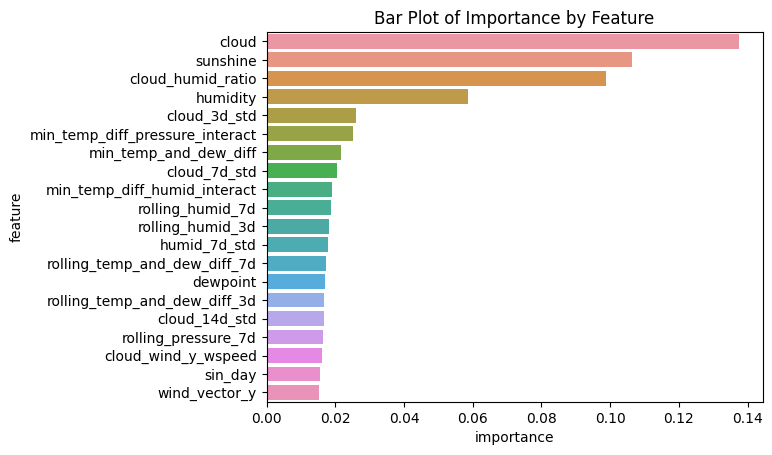

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


#The first feature:
"""
'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
'sin_day', 'cos_day', 'month', 'season', 'wind_direct_cat',
'wind_vector_x', 'wind_vector_y', 'wspeed_and_pressure',
'min_temp_and_dew_diff' + cloud_sun_ratio
"""
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)


model.fit(X_train, y_train)

importances = model.feature_importances_

# View as DataFrame
import pandas as pd
feature_names = X_train.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
top_20 = importance_df[:20]

sns.barplot(data=top_20.reset_index(), x='importance', y='feature')

# Optionally add a title and labels
plt.title('Bar Plot of Importance by Feature')
plt.xlabel('importance')
plt.ylabel('feature')

plt.show()


### Benefit XGB LGB and CatBoost

In [57]:
from sklearn.model_selection import KFold

from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score 


def check_other_model(X_train,y_train,model_name):

    """
    inputs: Xtrain and ytrain. It is because only to see feature importance. I dont want the model to touch test data yet.
    model_name: xgb, lgb or cat
    """
    xgb_params = {
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
    
    lgb_params = {
            'objective': 'binary',
            'metric': 'logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'verbose':-1
        }
    cb_params = {
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'random_state': 42,
        }

    if model_name == 'xgb':
        model = XGBClassifier()
    elif model_name == 'lgb':
        model = LGBMClassifier(verbose = -1)
    elif model_name == 'cat':
        model = CatBoostClassifier(verbose =0) #Set silent
    else:
        raise ValueError('Undefined model selected!')
    print(f"Selected model {model_name} is running:")
    print('---------'*10)
       
    feature_names = X_train.columns
    n_splits = 5
    f_score = 0        #each score in fold gonna be stored here.
    f_importance = []   #importances of each feature in fold gonna be stored here.
    
    kf = KFold(n_splits = n_splits,shuffle = True,random_state= 42) # 1 in 5 (%20)

    
    #it is for only seeing the feature importance. 
    for train_index,test_index in kf.split(X_train):
        X_train_fold , X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold , y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        #print(X_train_fold.shape) (1226, 48) (1533/5*4 == 1126)
        #print(X_test_fold.shape) (307, 48)
        #print(y_train_fold.shape) (1226,)
        #print(y_test_fold.shape) (307,)

        model.fit(X_train_fold,y_train_fold)
        #Only see the ROC AUC: -> use model.predict_proba()[:,1] 0-> negative pred, 1-> positive pred
        fold_predc = model.predict_proba(X_test_fold)[:,1]
        #print(fold_predc.shape) #(307,)
        #print(roc_auc_score(y_test_fold,fold_predc))
        f_score += roc_auc_score(y_test_fold,fold_predc)
        f_imp = model.feature_importances_ #send the importance in order of column of x
        f_importance.append(f_imp)
        
    print(f"Average AUC Score:{f_score/n_splits:.2f}")

    oof_feature_importance = np.mean(f_importance,axis=0)
    df_importance = pd.DataFrame({
        'feature':feature_names,
        'importance':oof_feature_importance
        })
    df_importance = df_importance.sort_values(by='importance', ascending=False)
    print(df_importance[:10].head(10))
    return df_importance

xgb_importance = check_other_model(X_train,y_train,'xgb')
lgb_importance = check_other_model(X_train,y_train,'lgb')
cat_importance = check_other_model(X_train,y_train,'cat')


Selected model xgb is running:
------------------------------------------------------------------------------------------
Average AUC Score:0.89
                         feature  importance
7                          cloud    0.239943
28          rolling_pressure_14d    0.033904
8                       sunshine    0.027084
31                 extreme_press    0.026087
2                        maxtemp    0.025219
5                       dewpoint    0.023879
0                            day    0.022590
6                       humidity    0.021545
33  min_temp_diff_humid_interact    0.021276
24  rolling_temp_and_dew_diff_7d    0.020128
Selected model lgb is running:
------------------------------------------------------------------------------------------
Average AUC Score:0.89
                         feature  importance
7                          cloud       173.2
8                       sunshine       145.6
43                  humid_7d_std       103.0
21  rolling_temp_and_dew_diff_3d   

In [58]:
def best_feature_finder(xgb,lgb,cb):
    n = 45 
    common_elements = set(xgb['feature'][:n]) & set(lgb['feature'][:n]) & set(cb['feature'][:n]) #gathering the cross features 
    return common_elements

feature_selection = best_feature_finder(xgb_importance,lgb_importance,cat_importance)

In [59]:
print('feature number:',len(xgb_importance))
print('the feature number to be trained, ',len(feature_selection))

feature number: 48
the feature number to be trained,  43


In [60]:
feature_selection

{'cloud',
 'cloud_14d_std',
 'cloud_3d_std',
 'cloud_7d_std',
 'cloud_humid_ratio',
 'cloud_wind_y_wspeed',
 'cos_day',
 'day',
 'dewpoint',
 'humid_14d_std',
 'humid_3d_std',
 'humid_7d_std',
 'humidity',
 'maxtemp',
 'min_temp_and_dew_diff',
 'min_temp_diff_humid_interact',
 'min_temp_diff_pressure_interact',
 'mintemp',
 'pressure',
 'pressure_14d_std',
 'pressure_3d_std',
 'pressure_7d_std',
 'rolling_humid_14d',
 'rolling_humid_3d',
 'rolling_humid_7d',
 'rolling_pressure_14d',
 'rolling_pressure_3d',
 'rolling_pressure_7d',
 'rolling_temp_and_dew_diff_14d',
 'rolling_temp_and_dew_diff_3d',
 'rolling_temp_and_dew_diff_7d',
 'season',
 'sin_day',
 'sunshine',
 'temparature',
 'w_speed_14d_std',
 'w_speed_3d_std',
 'w_speed_7d_std',
 'wind_vector_x',
 'wind_vector_y',
 'winddirection',
 'windspeed',
 'wspeed_and_pressure'}

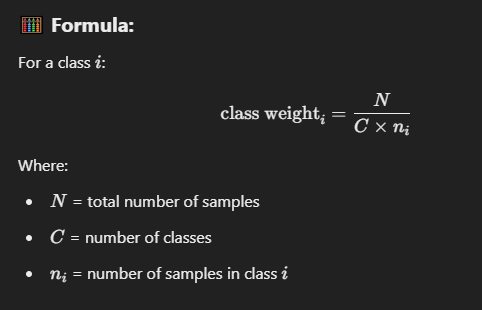

In [61]:
#class balance:
total = y.count()
a=y.value_counts().reset_index()
class_one =a.loc[a['rainfall'] == 1, 'count'].squeeze()
class_zero =a.loc[a['rainfall'] == 0, 'count'].squeeze()

weight_one = total/(2*class_one)
weight_zero = total/(2*class_zero)
print(f'(Class0: {weight_zero:.2f} // Class1: {weight_one:.2f})')


#for XGB:
scale_pos_weight = round(class_zero/class_one,3)
print('scale_pos_weight,',scale_pos_weight)

(Class0: 2.03 // Class1: 0.66)
scale_pos_weight, 0.327


How to import the weight into other models:

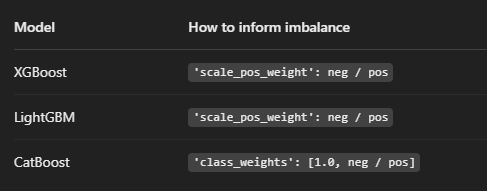

Since it is imbalance, so i need to use kfold in a way that more competible with imbalance: **stratified kfold**

Let see the best parameters **without Stratified kfold**:

In [84]:
from sklearn.model_selection import StratifiedKFold
import optuna
from xgboost import XGBClassifier 
from sklearn.metrics import f1_score

def model(lr,max_depth,subsample,colsample_bytree):
    xgb_params = {
        'learning_rate': lr,
        'max_depth': max_depth,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'n_estimators': 100,
        'n_jobs': -1,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'hist',
        'random_state': 42,
        'use_label_encoder': False,
        'verbosity': 0
        }
    return XGBClassifier(**xgb_params)
        
def objective(trial):
    
    lr = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    threshold = trial.suggest_float("threshold", 0.1, 0.9)

    xgb = model(lr,max_depth,subsample,colsample_bytree)
    
    X_train, X_val, y_train, y_val = train_test_split(norm_train, y, test_size=0.3, random_state=42)
    xgb.fit(X_train, y_train,verbose = False)

    y_prob = xgb.predict_proba(X_val)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred)

    return f1


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)


[I 2025-04-06 12:17:49,132] A new study created in memory with name: no-name-e5f4f036-824d-413e-a309-b7f733af5ea7
[I 2025-04-06 12:17:49,481] Trial 0 finished with value: 0.8544027898866607 and parameters: {'learning_rate': 0.0015363769324458966, 'max_depth': 10, 'subsample': 0.7632460225414679, 'colsample_bytree': 0.3375716209111105, 'threshold': 0.5816803064907009}. Best is trial 0 with value: 0.8544027898866607.
[I 2025-04-06 12:17:49,650] Trial 1 finished with value: 0.8154897494305238 and parameters: {'learning_rate': 0.012345049585701784, 'max_depth': 5, 'subsample': 0.759623386518538, 'colsample_bytree': 0.35770540243021365, 'threshold': 0.825271978403569}. Best is trial 0 with value: 0.8544027898866607.
[I 2025-04-06 12:17:49,902] Trial 2 finished with value: 0.8544027898866607 and parameters: {'learning_rate': 0.0004358627143818197, 'max_depth': 5, 'subsample': 0.9500265606157277, 'colsample_bytree': 0.8252694673213927, 'threshold': 0.4354749647477648}. Best is trial 0 with va

In [85]:
print("Best params:", study.best_params)
print("Best F1 score:", study.best_value)

Best params: {'learning_rate': 0.04207338706005672, 'max_depth': 10, 'subsample': 0.7190088938381993, 'colsample_bytree': 0.5753256241976069, 'threshold': 0.5388742361833178}
Best F1 score: 0.9105211406096362


In [86]:
# xgb = model(lr,max_depth,subsample,colsample_bytree)
threshold = study.best_params['threshold']

final_model = model(study.best_params['learning_rate'],
          study.best_params['max_depth'],
          study.best_params['subsample'],
          study.best_params['colsample_bytree']
         )

X_train, X_val, y_train, y_val = train_test_split(norm_train, y, test_size=0.3, random_state=42)
    
final_model.fit(X_train, y_train,
               eval_set = [(X_val,y_val)],
               verbose = 0)


y_prob = final_model.predict_proba(X_val)[:, 1]
y_pred = (y_prob >= threshold).astype(int)
f1 = f1_score(y_val, y_pred)
print('f1 score: ',f1)

y_prob = final_model.predict_proba(norm_test)[:, 1]
#y_pred = (y_prob >= threshold).astype(int) because the prediction is supposed to be probability.

list_of_ids = sub['id'].tolist()

pred_xgb = {'id':sub['id'].tolist(),
     'rainfall':y_prob}

pred_xgb = pd.DataFrame(pred_xgb)

pred_xgb.to_csv('/kaggle/working/wo_blend.csv',index = False)

f1 score:  0.9105211406096362


In [87]:
#let see the results:
pred_xgb.head()

,id,rainfall
0,2190,0.930012
1,2191,0.948975
2,2192,0.840570
3,2193,0.268674
4,2194,0.313466


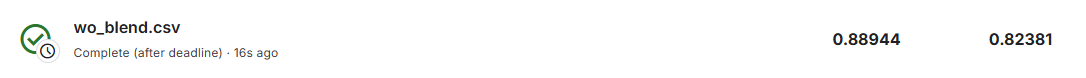


### Handover Catboost:

I want to optimize hyperparameters so that the model works best. Threshold value is involved into hyperparameters to be decided in objective.

In [88]:
from catboost import CatBoostClassifier
from catboost import Pool
from sklearn.metrics import f1_score
optuna.logging.set_verbosity(optuna.logging.INFO)


def objective(trial):
    cboost_params = {
        'learning_rate': trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        'iterations': trial.suggest_int("iterations",100,1000, step=100),
        'depth': trial.suggest_int("depth",4,10),
        'loss_function': 'Logloss',
        'eval_metric' : 'F1',
        'random_state': 42,
        'verbose': 100, #report results in every 100
        'scale_pos_weight' :scale_pos_weight, #inform the model about class imbalance,
        'task_type': 'GPU',           # ✅ Enables GPU usage
        'devices': '0'                # optional — selects which GPU to use
        }
    
    model = CatBoostClassifier(**cboost_params)

    #my data is imbalance, so i need to split data with sk.fold:
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

    f1scores =[]
    for fold, (train_idx,val_idx) in enumerate (skf.split(norm_train,y)):
        ptrain = Pool(data = norm_train.iloc[train_idx], label = y.iloc[train_idx])
        pval = Pool(data = norm_train.iloc[val_idx], label = y.iloc[val_idx])

        model.fit(ptrain, eval_set = pval,early_stopping_rounds=30,verbose = 0)

        y_probs = model.predict_proba(norm_train.iloc[val_idx])[:,1]

        threshold = trial.suggest_float("threshold",0.3,0.8) 
        y_preds = (y_probs >= threshold).astype(int)

        f1 = f1_score(y.iloc[val_idx], y_preds)
        f1scores.append(f1)

    return np.mean(f1scores)

study = optuna.create_study(study_name = 'catboost_',
                            direction="maximize")
study.optimize(objective, n_trials=100)

# ⬇️ Add this to see best results manually
print(f"\n🎯 Best F1 Score: {study.best_value:.4f}")
print(f"🏆 Best Parameters: {study.best_params}")

[I 2025-04-06 12:18:56,558] A new study created in memory with name: catboost_
[I 2025-04-06 12:19:00,077] Trial 0 finished with value: 0.8593750000000002 and parameters: {'learning_rate': 0.012711240672438236, 'iterations': 200, 'depth': 4, 'threshold': 0.3093708226357993}. Best is trial 0 with value: 0.8593750000000002.
[I 2025-04-06 12:19:09,111] Trial 1 finished with value: 0.8946898019685513 and parameters: {'learning_rate': 0.010611514011013635, 'iterations': 300, 'depth': 10, 'threshold': 0.4588633050761208}. Best is trial 1 with value: 0.8946898019685513.
[I 2025-04-06 12:19:14,887] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 0.0009560239122271842, 'iterations': 900, 'depth': 4, 'threshold': 0.5730785486035792}. Best is trial 1 with value: 0.8946898019685513.
[I 2025-04-06 12:19:22,184] Trial 3 finished with value: 0.8897170191215501 and parameters: {'learning_rate': 0.06389418553577948, 'iterations': 900, 'depth': 4, 'threshold': 0.41014523625227955}. Be


🎯 Best F1 Score: 0.9123
🏆 Best Parameters: {'learning_rate': 0.08661836450838649, 'iterations': 200, 'depth': 10, 'threshold': 0.36260351809770935}


In [89]:
from sklearn.metrics import roc_auc_score


cboost_params = {
       'learning_rate': 0.08661836450838649,
        'iterations': 200,
        'depth': 10,
        'loss_function': 'Logloss',
        'eval_metric' : 'F1',
        'random_state': 42,
        'verbose': 100, #report results in every 100
        'scale_pos_weight' :scale_pos_weight, #inform the model about class imbalance,
        'task_type': 'GPU',           # ✅ Enables GPU usage
        'devices': '0',                # optional — selects which GPU to use
        'verbose': 1        
}
threshold = 0.36260351809770935
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
model = CatBoostClassifier(**cboost_params)

test_cross = []
for fold, (train_idx,val_idx) in enumerate (skf.split(norm_train,y)):
    ptrain = Pool(data = norm_train.iloc[train_idx], label = y.iloc[train_idx])
    pval = Pool(data = norm_train.iloc[val_idx], label = y.iloc[val_idx])

    model.fit(ptrain, eval_set = pval,early_stopping_rounds=30,verbose = 0)
    yprobs = model.predict_proba(norm_train.iloc[val_idx])[:, 1]

    y_preds = (yprobs >= threshold).astype(int)

    f1 = f1_score(y.iloc[val_idx], y_preds)
    print(f'Fold {fold} -> F1 Score: {f1}')
    print('-'*30)  
    
   
    test_pred=model.predict_proba(norm_test)[:, 1]
    test_cross.append(test_pred)

Fold 0 -> F1 Score: 0.9311377245508982
------------------------------
Fold 1 -> F1 Score: 0.9011976047904192
------------------------------
Fold 2 -> F1 Score: 0.8952095808383232
------------------------------
Fold 3 -> F1 Score: 0.9082840236686389
------------------------------
Fold 4 -> F1 Score: 0.9258160237388724
------------------------------


In [91]:
pred_cat = np.mean(np.array(test_cross), axis=0)

list_of_ids = sub['id'].tolist()

pred_cboost = {'id':sub['id'].tolist(),
     'rainfall':pred_cat}

pred_cboost = pd.DataFrame(pred_cboost)
pred_cboost.to_csv('/kaggle/working/woBlend_catboost.csv',index = False)

In [98]:
cluster = pd.concat([pred_cboost['rainfall'],pred_xgb['rainfall']],axis = 1)
cluster.columns = ['rainfall_cb','rainfall_xgb']
cluster.head(10)

,rainfall_cb,rainfall_xgb
0,0.806849,0.930012
1,0.918535,0.948975
2,0.780986,0.840570
3,0.266184,0.268674
4,0.250060,0.313466
5,0.628469,0.717231
6,0.743494,0.876152
7,0.860842,0.959681
8,0.780691,0.942031
9,0.660530,0.826585


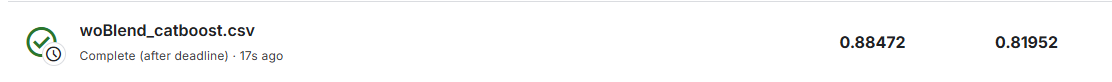

# Ensemble 

In [104]:
import tensorflow as tf
global device

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available")
    device = 'gpu'
else:
    print("GPU is not available")
    device = 'cpu'

GPU is available


In [105]:
import warnings
warnings.filterwarnings("ignore")


xgb_params = {
        'learning_rate': 0.04207338706005672,
        'max_depth': 10,
        'subsample': 0.7190088938381993,
        'colsample_bytree': 0.5753256241976069,
        'n_estimators': 100,
        'n_jobs': -1,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'hist',
        'random_state': 42,
        'use_label_encoder': False,
        'verbosity': 0
        }

model1 = XGBClassifier(**xgb_params)
    
# LightGBM parameters
lgb_params = {
           'n_estimators': 200,
           'max_depth': 10, 
           'min_samples_leaf': 33, 
           'subsample': 0.8144362305468624, 
           'learning_rate': 0.00647777270150904, 
           'lambda_l1': 1.2991459277687692e-05, 
           'lambda_l2': 0.0007304768170358017,
           'objective': 'binary',  # Changed to binary
           'metric': 'auc',  # Changed to binary error
           'boosting_type': 'gbdt',
           'device': device,
           'random_state': 42,
            'eval_metric':'AUC',
           'verbose': -1
}
model2 = LGBMClassifier(**lgb_params)

cboost_params = {
       'learning_rate': 0.08661836450838649,
        'iterations': 200,
        'depth': 10,
        'loss_function': 'Logloss',
        'eval_metric' : 'F1',
        'random_state': 42,
        'verbose': 100, #report results in every 100
        'scale_pos_weight' :scale_pos_weight, #inform the model about class imbalance,
        'task_type': 'GPU',           # ✅ Enables GPU usage
        'devices': '0',                # optional — selects which GPU to use
        'verbose': 1        
}

model3 = CatBoostClassifier(**cboost_params)

model_list = [model1,model2,model3]


In [106]:
model_list

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.5753256241976069, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric='logloss', feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.04207338706005672,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=-1,
               num_parallel_tree=None, random_state=42, ...),
 LGBMClassifier(device='gpu', eval_metric='AUC',
                lambda_l1=1.2991459277687692e-05,
                lambda_l2=0.0007304768170358017,
                learning_rate=0.00647777

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.base import clone
import numpy as np

model_list = [model1, model2, model3]
final_test_preds = []  # This will store test prediction from each trial

def objective(trial):
    # Step 1: Suggest weights and normalize
    w1 = trial.suggest_float("xgb_weight", 0, 1)
    w2 = trial.suggest_float("lgb_weight", 0, 1)
    w3 = trial.suggest_float("cat_weight", 0, 1)

    w_list = np.array([w1, w2, w3])
    w_list = w_list / w_list.sum()

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(y))
    test_preds_accumulator = []

    for fold_nmb, (train_idx, val_idx) in enumerate(skf.split(norm_train, y)):
        X_train_cv = norm_train.iloc[train_idx]
        y_train_cv = y.iloc[train_idx]
        X_val_cv = norm_train.iloc[val_idx]
        y_val_cv = y.iloc[val_idx]

        fold_val_preds = np.zeros((len(y_val_cv), len(model_list)))
        fold_test_preds = np.zeros((norm_test.shape[0], len(model_list)))

        for i, (model, w) in enumerate(zip(model_list, w_list)):
            # Clone model to avoid overwriting previously trained models
            fresh_model = clone(model)
            if isinstance(model,LGBMClassifier):
            # Fit model
                fresh_model.fit(X_train_cv, y_train_cv,
                            eval_set=[(X_val_cv, y_val_cv)]
                           )
                
            else: #not lgb
                # Fit model
                fresh_model.fit(X_train_cv, y_train_cv, verbose=False,
                            eval_set=[(X_val_cv, y_val_cv)]
                            )

            # Predict on validation and test sets
            fold_val_preds[:, i] = fresh_model.predict_proba(X_val_cv)[:, 1]
            fold_test_preds[:, i] = fresh_model.predict_proba(norm_test)[:, 1]

        # Blend validation predictions
        blended_val = np.dot(fold_val_preds, w_list)
        oof_preds[val_idx] = blended_val

        # Blend test predictions for this fold
        blended_test = np.dot(fold_test_preds, w_list)
        test_preds_accumulator.append(blended_test)

    # Score using ROC AUC on full OOF predictions
    roc_auc = roc_auc_score(y, oof_preds)

    # Average test predictions across folds
    final_test_pred = np.mean(test_preds_accumulator, axis=0)
    final_test_preds.append(final_test_pred)

    return roc_auc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2025-04-06 12:51:51,505] A new study created in memory with name: no-name-15f8c992-7b94-4be6-af93-eaff0d0e9795
[I 2025-04-06 12:52:24,525] Trial 0 finished with value: 0.8827508417508418 and parameters: {'xgb_weight': 0.9650863014752743, 'lgb_weight': 0.5431780757850665, 'cat_weight': 0.22302334144491287}. Best is trial 0 with value: 0.8827508417508418.
[I 2025-04-06 12:52:58,812] Trial 1 finished with value: 0.8801470258136925 and parameters: {'xgb_weight': 0.35860851705953156, 'lgb_weight': 0.9453956074316885, 'cat_weight': 0.5192743487870755}. Best is trial 0 with value: 0.8827508417508418.
[I 2025-04-06 12:53:32,414] Trial 2 finished with value: 0.8786677890011223 and parameters: {'xgb_weight': 0.6056461167622328, 'lgb_weight': 0.053628775995350875, 'cat_weight': 0.5198110254863549}. Best is trial 0 with value: 0.8827508417508418.
[I 2025-04-06 12:54:06,294] Trial 3 finished with value: 0.8792356902356904 and parameters: {'xgb_weight': 0.11566300359326831, 'lgb_weight': 0.369894

In [110]:
print("Best params:", study.best_params)
print("Best auc score:", study.best_value)


Best params: {'xgb_weight': 0.8299431473945185, 'lgb_weight': 0.31245938819416647, 'cat_weight': 0.04786438426499412}
Best auc score: 0.8834579124579124


In [112]:
blend_pred = np.mean(final_test_preds, axis=0)

In [118]:
list_of_ids = sub['id'].tolist()

k = {'id':sub['id'].tolist(),
     'rainfall':blend_pred['rainfall']}

blend_pred = pd.DataFrame(k)
blend_pred.head()
blend_pred.to_csv('/kaggle/working/predblends.csv',index = False)

In [115]:
cluster = pd.concat([cluster,blend_pred['rainfall']],axis = 1)
cluster.columns = ['rainfall_cb','rainfall_xgb', 'rainfall_blend']
cluster.head(10)

,rainfall_cb,rainfall_xgb,rainfall_blend
0,0.806849,0.930012,0.862162
1,0.918535,0.948975,0.937489
2,0.780986,0.840570,0.872920
3,0.266184,0.268674,0.427636
4,0.250060,0.313466,0.440851
5,0.628469,0.717231,0.749077
6,0.743494,0.876152,0.837111
7,0.860842,0.959681,0.904772
8,0.780691,0.942031,0.893955
9,0.660530,0.826585,0.741872


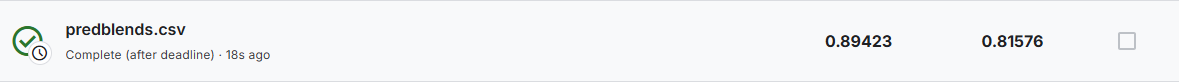